In [1]:
import os
os.getcwd()

'C:\\Users\\mohit'

In [2]:
%load_ext autoreload
%autoreload 2

from evaluation import evaluate
from algo import *
from matplotlib import pyplot as plt
import numpy as np

In [3]:
%%time
import dataset
files = ("D:/ydata-fp-td-clicks-v1_0.20090502",'D:/ydata-fp-td-clicks-v1_0.20090503')
dataset.get_events(files)

There are  7646058 with 62 unique articles
CPU times: total: 5min 5s
Wall time: 10min 42s


In [4]:
_, deploy_ctr = evaluate(Egreedy(1))
rnd_ctr = deploy_ctr[-1]

We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
Egreedy (ε=1)       0.031     0.0317    1.3m


In [10]:
def plot_results(tests):
    
    learn_ctrs = []
    deploy_ctrs = []

    for alg in tests:
        learn, deploy = evaluate(alg)
        learn = learn[1000:]
        if hasattr(alg, 'e'):
            plt.plot(learn, label="ε={}".format(alg.e))
        else:
            plt.plot(learn, label="α={}".format(alg.alpha))
        
        learn_ctrs.append(learn[-1]/rnd_ctr)   
        deploy_ctrs.append(deploy[-1]/rnd_ctr) 

    plt.title("Learning bucket")
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    
    if hasattr(alg, 'e'):
        param_values = [x.e for x in tests]
        plt.xlabel("ε")
    else:
        param_values = [x.alpha for x in tests]
        plt.xlabel("α")
    plt.plot(param_values, learn_ctrs,marker='o')
    plt.title('Learning bucket')
    plt.ylabel("CTR lift")
    plt.show()


    if hasattr(alg, 'e'):
        plt.xlabel("ε")
    else: 
        plt.xlabel("α")
    plt.ylabel("CTR lift")
    plt.plot(param_values, deploy_ctrs,marker='o')
    plt.title('Deployment bucket')
    plt.show()

    best_idx = np.argmax(deploy_ctrs)
    print('Best parameter on Deployment Bucket:',tests[best_idx].algorithm)

# FOR E-GREEDY

We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
Egreedy (ε=0.1)     0.0409    0.0414    2.2m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
Egreedy (ε=0.2)     0.0405    0.0404    1.9m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
Egreedy (ε=0.3)     0.0401    0.0387    2.0m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
Egreedy (ε=0.4)     0.0371    0.0381    1.9m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
Egreedy (ε=0.5)     0.0374    0.0392    1.8m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
Egreedy (ε=0.6)     0.0362    0.0371    1.7m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
Egreedy (ε=0.7)     0.035     0.034  

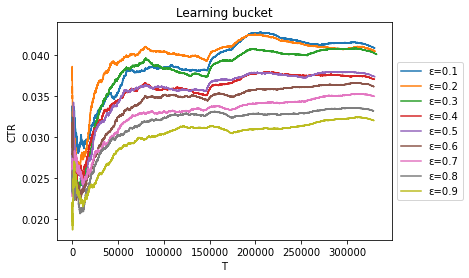

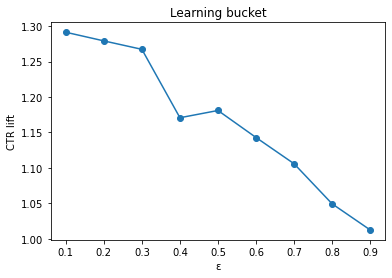

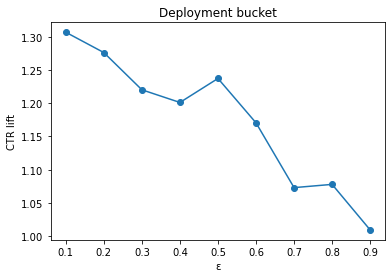

Best parameter on Deployment Bucket: Egreedy (ε=0.1)
CPU times: total: 7min 9s
Wall time: 16min 29s


In [11]:
%%time
epsilon = np.arange(0.1,1,0.1)
tests = [Egreedy(e) for e in epsilon]
plot_results(tests)

# FOR UCB1

We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
UCB1 (α=0.1)        0.0423    0.0425    4.0m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
UCB1 (α=0.3)        0.0409    0.0411    3.9m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
UCB1 (α=0.5)        0.0402    0.0408    3.6m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
UCB1 (α=0.7)        0.0396    0.0378    2.6m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
UCB1 (α=0.9)        0.0383    0.0382    2.4m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
UCB1 (α=1.1)        0.0372    0.037     2.5m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
UCB1 (α=1.3)        0.0374    0.0376 

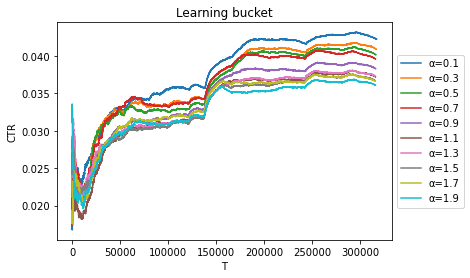

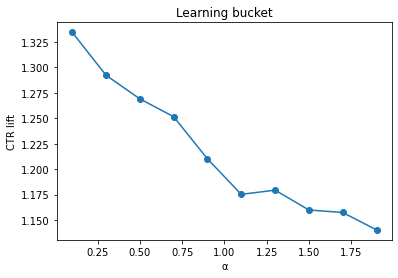

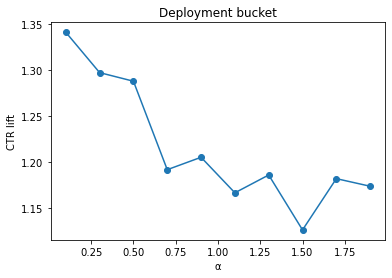

Best parameter on Deployment Bucket: UCB1 (α=0.1)
CPU times: total: 11min 29s
Wall time: 30min 33s


In [12]:
%%time
alpha = np.arange(0.1,2,0.2)
tests = [Ucb1(a) for a in alpha]
plot_results(tests)

# FOR LIN-UCB(CONTEXT="both")

We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
LinUCB (α=0.1, context:both)0.0497    0.0512    11.1m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
LinUCB (α=0.3, context:both)0.0509    0.0511    10.9m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
LinUCB (α=0.5, context:both)0.0486    0.0482    11.0m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
LinUCB (α=0.7, context:both)0.0481    0.0482    11.0m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
LinUCB (α=0.9, context:both)0.0476    0.0475    282.5m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
LinUCB (α=1.1, context:both)0.0468    0.0459    16.1m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time 

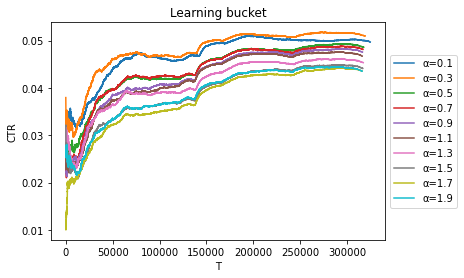

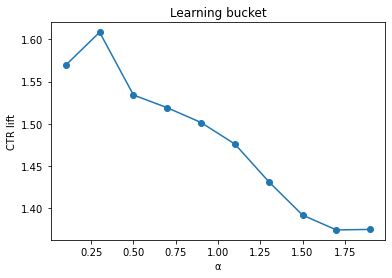

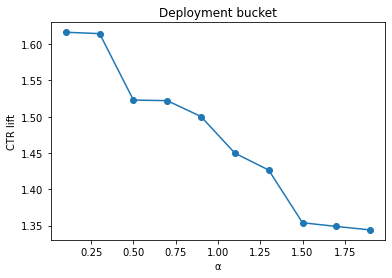

Best parameter on Deployment Bucket: LinUCB (α=0.1, context:both)
CPU times: total: 50min 55s
Wall time: 6h 44min 44s


In [13]:
%%time
alpha = np.arange(0.1,2,0.2)
tests = [LinUCB(a, context="both") for a in alpha]
plot_results(tests)

# FOR LIN-UCB (CONTEXT="user")

We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
LinUCB (α=0.1, context:user)0.0487    0.0486    10.0m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
LinUCB (α=0.3, context:user)0.0503    0.0494    9.3m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
LinUCB (α=0.5, context:user)0.0498    0.0492    9.3m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
LinUCB (α=0.7, context:user)0.0482    0.0499    9.1m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
LinUCB (α=0.9, context:user)0.0477    0.0474    9.3m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for the algorithm
LinUCB (α=1.1, context:user)0.0461    0.0455    9.2m
We print Algorithm's Name, G_learn/T_learn, G_deploy/T_deploy and execution time for th

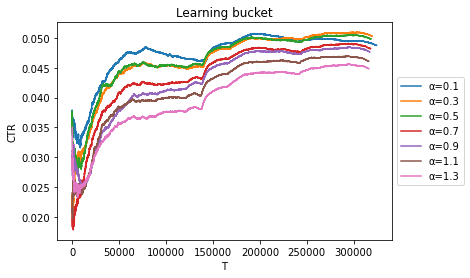

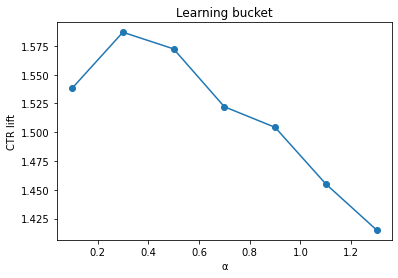

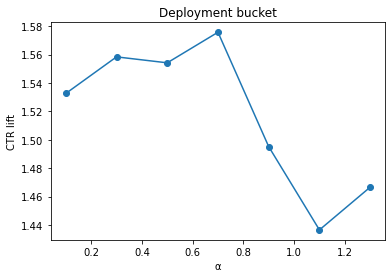

Best parameter on Deployment Bucket: LinUCB (α=0.7, context:user)
CPU times: total: 18min 6s
Wall time: 1h 5min 37s


In [14]:
%%time
alpha = np.arange(0.1,1.4,0.2)
tests = [LinUCB(a, context="user") for a in alpha]
plot_results(tests)